# Email/SMS Spam Detection

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
df = pd.read_csv('C:/STUDY/Data Science/All Data Science Projects/Email or SMS Spam Detection/spam.csv',encoding='latin-1')
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [143]:
df.tail(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...,NaN,NaN,NaN
5563,ham,Ard 6 like dat lor.,NaN,NaN,NaN
5564,ham,Why don't you wait 'til at least wednesday to ...,NaN,NaN,NaN
5565,ham,Huh y lei...,NaN,NaN,NaN
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


## 1 - Data Cleaning

**Dropping Unncessary Columns**

In [144]:
df = df.drop(columns = ['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'])
df.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


**Renaming the Columns**

In [145]:
df.rename(columns = {'v1' : 'Label' , 'v2' : 'Statement'},inplace=True)

In [146]:
df.head(10)

,Label,Statement
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [147]:
df.shape

(5572, 2)

In [148]:
df['Label'].value_counts()

ham     4825
spam     747
Name: Label, dtype: int64

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Label      5572 non-null   object
 1   Statement  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [150]:
df.isnull().sum()

Label        0
Statement    0
dtype: int64

There is no missing values in this dataset

In [151]:
from sklearn.preprocessing import LabelEncoder

In [152]:
encoder = LabelEncoder()

In [153]:
df['Label'] = encoder.fit_transform(df['Label'])

In [154]:
df.head(10)

,Label,Statement
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


1. 0 : Ham
2. 1 : Spam

**Checking the Duplicate Values**

In [155]:
df.duplicated().sum()

403

In [156]:
## dropping the duplicate values

df = df.drop_duplicates(keep = 'first')
df.head(10)

,Label,Statement
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [157]:
df.duplicated().sum()

0

Here we have removed all the duplicate values from our dataset

In [158]:
df.shape

(5169, 2)

## 2 - EDA

In [159]:
df['Label'].value_counts().reset_index()

,index,Label
0,0,4516
1,1,653


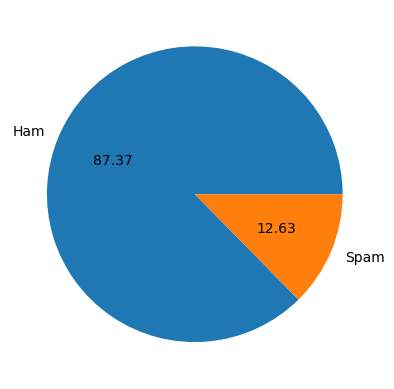

In [160]:
plt.pie(df['Label'].value_counts() , labels = ['Ham' , 'Spam'] , autopct = '%0.2f')
plt.show()

Here we can see that Our **Data is Imbalanced**

In [161]:
!pip install nltk

In [162]:
import nltk

In [163]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Now We will create three columns for : 
1. Total number of characters
2. Total number of words
3. Total number of sentence

**1 - Total Characters/alphabets**

In [164]:
# To calculate total number of characters/alphabets in the statement

df['Total_characters'] = df['Statement'].apply(len)

In [165]:
df.head(10)

,Label,Statement,Total_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
5,1,FreeMsg Hey there darling it's been 3 week's n...,148
6,0,Even my brother is not like to speak with me. ...,77
7,0,As per your request 'Melle Melle (Oru Minnamin...,160
8,1,WINNER!! As a valued network customer you have...,158
9,1,Had your mobile 11 months or more? U R entitle...,154


**2 - Total Words**

In [166]:
# To calculate total number of words in the statement

df['Total_words'] = df['Statement'].apply(lambda x : len(nltk.word_tokenize(x)))

In [167]:
df.head(10)

,Label,Statement,Total_characters,Total_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39
6,0,Even my brother is not like to speak with me. ...,77,18
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31
8,1,WINNER!! As a valued network customer you have...,158,32
9,1,Had your mobile 11 months or more? U R entitle...,154,31


**3 - Total Sentence**

In [168]:
# To calculate total number of sentences in the statement

df['Total_sentence'] = df['Statement'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [169]:
df.head(10)

,Label,Statement,Total_characters,Total_words,Total_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4
6,0,Even my brother is not like to speak with me. ...,77,18,2
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2
8,1,WINNER!! As a valued network customer you have...,158,32,5
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3


In [170]:
df[['Total_characters' , 'Total_words' , 'Total_sentence']].describe()

,Total_characters,Total_words,Total_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [171]:
# Now checking this for both Ham and Spam

**1 - Ham**

In [172]:
df[df['Label'] == 0][['Total_characters' , 'Total_words' , 'Total_sentence']].describe()

,Total_characters,Total_words,Total_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


**2 - Spam**

In [173]:
df[df['Label'] == 1][['Total_characters' , 'Total_words' , 'Total_sentence']].describe()

,Total_characters,Total_words,Total_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


Text(0.5, 1.0, 'Total Number of Characters in Ham Vs Spam')

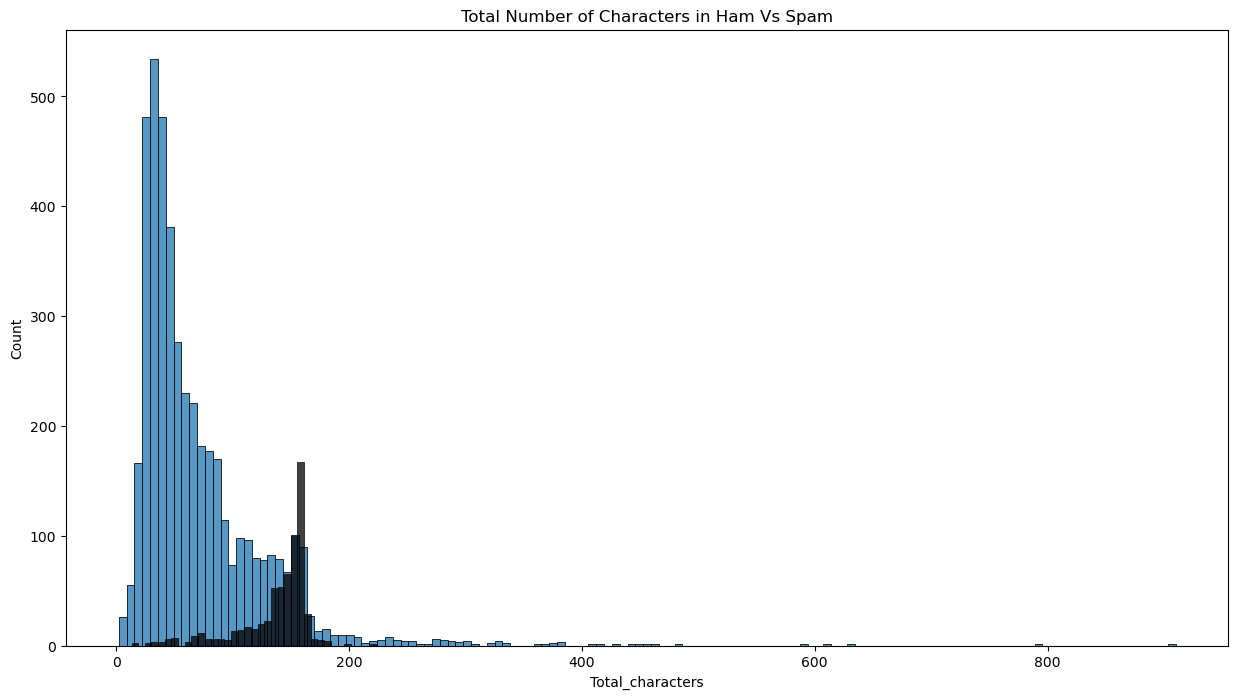

In [174]:
#plotting histogram for better understanding for total number of Characters
plt.figure(figsize = (15,8))
# for Ham
sns.histplot(df[df['Label'] == 0]['Total_characters'])

#for spam
sns.histplot(df[df['Label'] == 1]['Total_characters'] , color = 'black')

plt.title('Total Number of Characters in Ham Vs Spam')

Here we can see that number of **characters** in **Spam** messages are more than in **Ham**

Text(0.5, 1.0, 'Total Number of Words in Ham Vs Spam')

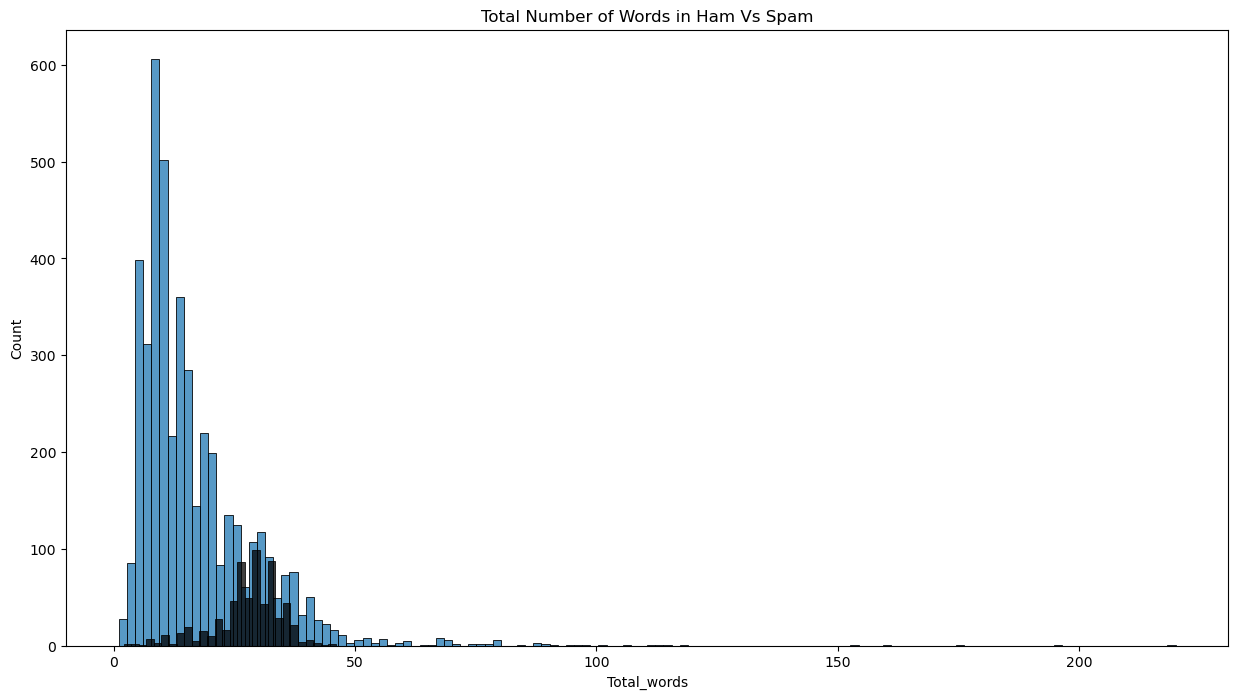

In [175]:
#plotting histogram for better understanding for total number of Words
plt.figure(figsize = (15,8))
# for Ham
sns.histplot(df[df['Label'] == 0]['Total_words'])

#for spam
sns.histplot(df[df['Label'] == 1]['Total_words'] , color = 'black')

plt.title('Total Number of Words in Ham Vs Spam')

Text(0.5, 1.0, 'Total Number of Sentence in Ham Vs Spam')

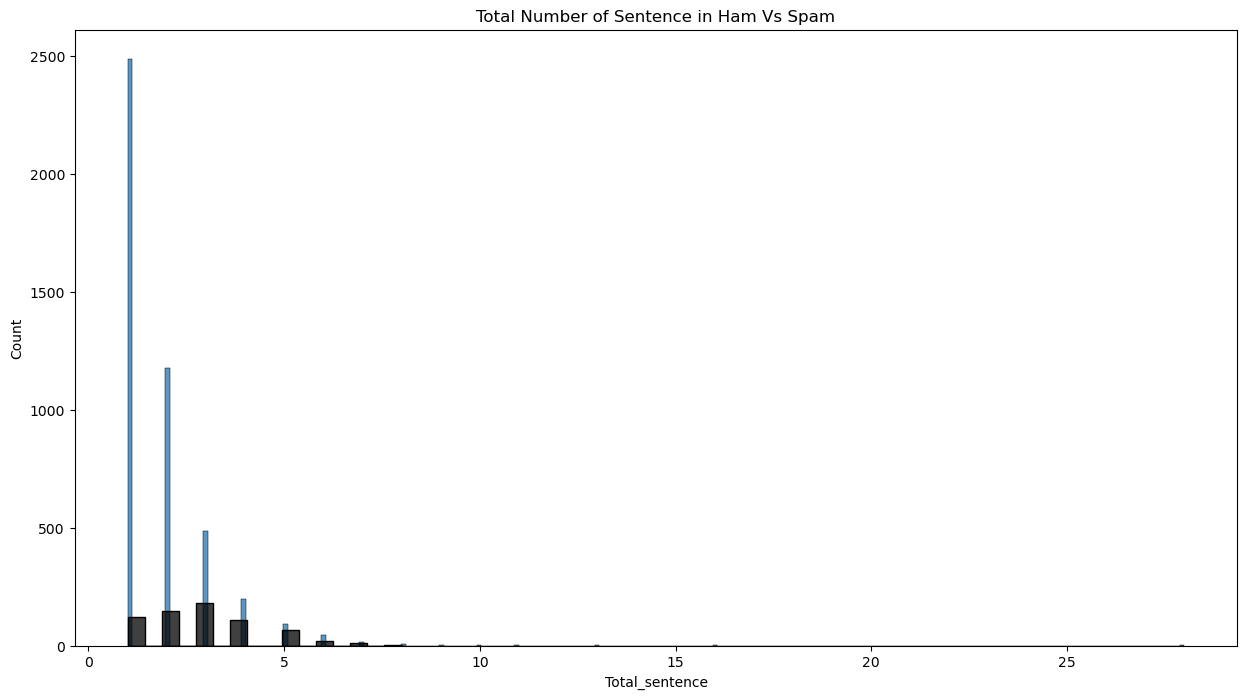

In [176]:
#plotting histogram for better understanding for total number of Sentence
plt.figure(figsize = (15,8))
# for Ham
sns.histplot(df[df['Label'] == 0]['Total_sentence'])

#for spam
sns.histplot(df[df['Label'] == 1]['Total_sentence'] , color = 'black')

plt.title('Total Number of Sentence in Ham Vs Spam')

**Checking the Relationship Between The columns**

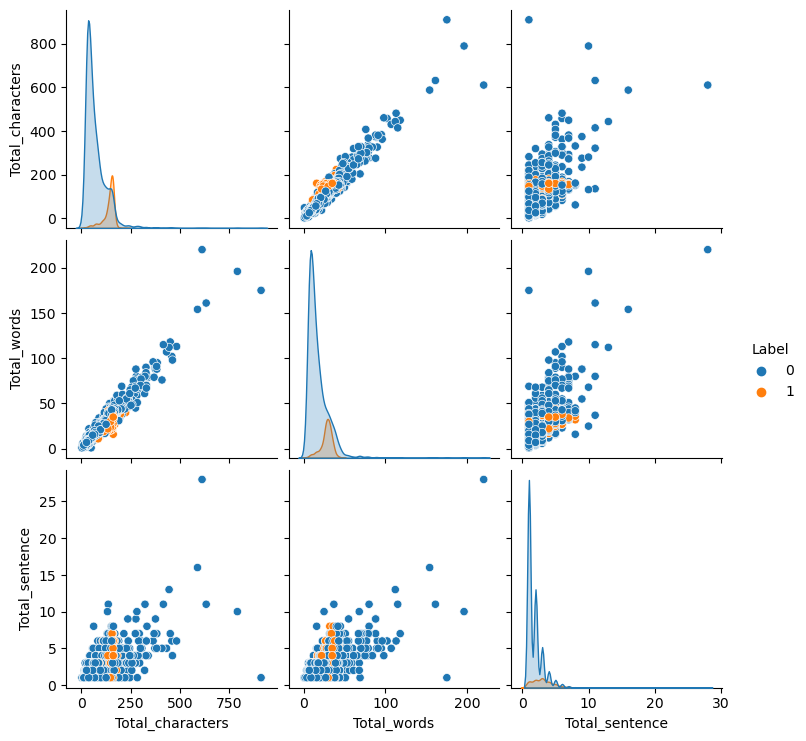

In [177]:
sns.pairplot(df,hue = 'Label')

Here in Our Data Set there are Outliers Present

**Now Checking the Correlation**

In [178]:
df.corr()

,Label,Total_characters,Total_words,Total_sentence
Label,1.000000,0.384717,0.262984,0.284901
Total_characters,0.384717,1.000000,0.965770,0.638143
Total_words,0.262984,0.965770,1.000000,0.684541
Total_sentence,0.284901,0.638143,0.684541,1.000000


<AxesSubplot:>

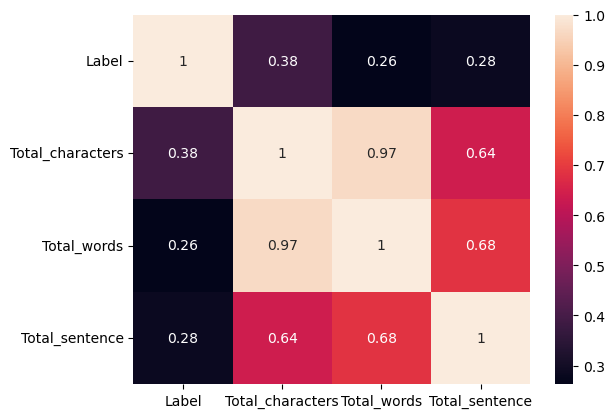

In [179]:
sns.heatmap(df.corr() , annot = True)

## 3 - Data(Text) Preprocessing 

1. Lower Case
2. Tokenization
3. Removing Special Characters
4. Removing Stop Words and Puntuation
5. Stemming

In [180]:
# Here we will create a function which will perform this all steps

def transform_text(Statement):
    Statement = Statement.lower()     # Will convert the statement to lowerCase
    Statement = nltk.word_tokenize(Statement)     # Will tokenize(break) the words in the sentence
    
    y = []
    for i in Statement:            # This Loop will will only contain alpha numeric value(It will remove Special characters)
        if i.isalnum():
            y.append(i)
            
    Statement = y[:]                  
    y.clear()
    
    for i in Statement:             # this loop will check is stopwords and punction is there or not(if yes then it will remove it)
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    Statement = y[:]
    y.clear()
    
    for i in Statement:           # Stemming
        y.append(ps.stem(i))
            
    return " ".join(y)

In [181]:
transform_text('HEllo My name is AKSHAR PATEL.I love Dancing.What about you!!')

'hello name akshar love'

In [182]:
# Stop words

from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [183]:
# punctuation 

import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [184]:
# Stemming (to reduce words to their root or base form, often by removing suffixes)

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [185]:
df['Transformed_Statement'] = df['Statement'].apply(transform_text)

In [186]:
df.head(10)

,Label,Statement,Total_characters,Total_words,Total_sentence,Transformed_Statement
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,per request mell oru minnaminungint nurungu ve...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...


In [188]:
# now we will be using Tranformed_Statement and Label for further process

In [189]:
# Here we will be creating wordcloud where we can see that which words are repeated most of the time

In [191]:
!pip install wordcloud

     -------------------------------------- 153.3/153.3 kB 1.1 MB/s eta 0:00:00


In [192]:
from wordcloud import WordCloud

In [194]:
wc = WordCloud(width = 700 , height = 700 , min_font_size = 10 , background_color = 'white')

In [197]:
spam_wc = wc.generate(df[df['Label'] == 1]['Transformed_Statement'].str.cat(sep = " "))

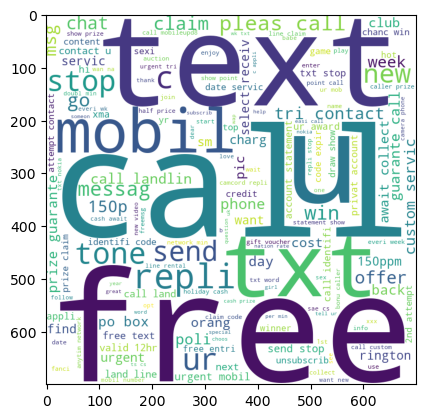

In [198]:
plt.imshow(spam_wc)

So this are the **SPAM** Words that are oftenly used

In [200]:
spam_wc = wc.generate(df[df['Label'] == 0]['Transformed_Statement'].str.cat(sep = " "))

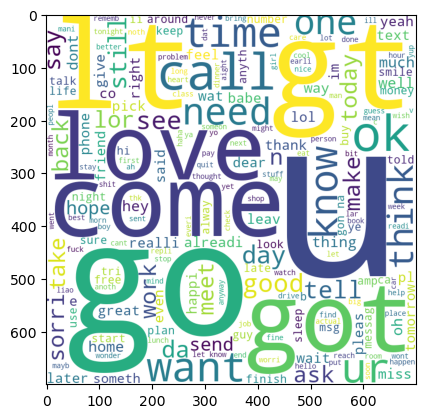

In [201]:
plt.imshow(spam_wc)

So this are the **HAM** Words that are oftenly used

In [202]:
# Now will check top 30 words that are used in SPAM message

In [207]:
spam_corpus = []

for msg in df[df['Label'] == 1]['Transformed_Statement'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [208]:
len(spam_corpus)

9939

In [210]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

C:\Users\rd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

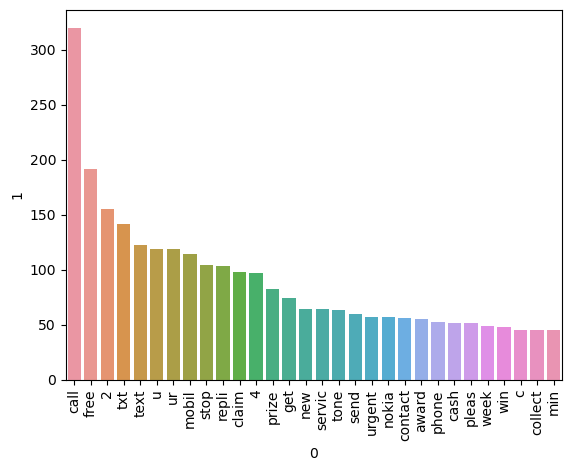

In [212]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0] , pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')

In [213]:
ham_corpus = []

for msg in df[df['Label'] == 0]['Transformed_Statement'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

In [215]:
len(ham_corpus)

35394

In [216]:
from collections import Counter
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 138),
 ('tell', 133),
 ('make', 129)]

## 4 - Model Building

In [217]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [220]:
X = tfidf.fit_transform(df['Transformed_Statement']).toarray()

In [221]:
X.shape

(5169, 3000)

In [223]:
y = df['Label'].values

In [224]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [225]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [226]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print('Accuracy is :',accuracy_score(y_test,y_pred1))
print('Confusion Matrix is : ',confusion_matrix(y_test,y_pred1))
print('Precision Score is :',precision_score(y_test,y_pred1))

Accuracy is : 0.8694390715667312
Confusion Matrix is :  [[788 108]
 [ 27 111]]
Precision Score is : 0.5068493150684932


In [227]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [228]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [231]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [232]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    
}

In [233]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [234]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [235]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865


C:\Users\rd\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9323017408123792
Precision -  0.8333333333333334
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8671875
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.92


In [236]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
9,GBDT,0.947776,0.920000
7,BgC,0.957447,0.867188
3,DT,0.932302,0.833333


In [237]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.974855
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,GBDT,Accuracy,0.947776
8,BgC,Accuracy,0.957447
9,DT,Accuracy,0.932302


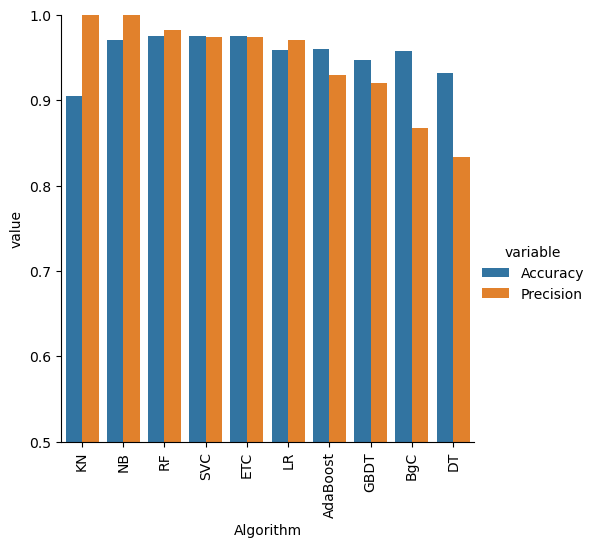

In [238]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [239]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))